In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Install the vaex library if needed

# pip install --pre vaex
# conda install -c conda-forge vaex

import vaex

In [3]:
from pygadget import Simulation

In [4]:
# read snap and subfind

from pygadget import Simulation, Subfind

basedir = '/home/patricia/backupragnar/Outputs/Run230_MARE_D/'
basename = 'snap_230_{snapNum:03d}'

snapNum = 31

snap = Simulation(basedir + basename.format(snapNum=snapNum), pot=True)

In [5]:
# read positions blocks

gas_pos = snap.read_block('pos', 'gas')
halo_pos = snap.read_block('pos', 'halo')
stars_pos = snap.read_block('pos', 'stars')

In [6]:
# plot options

colors = [plt.cm.Greens_r, plt.cm.Reds_r, plt.cm.Blues_r]
plots = [halo_pos, gas_pos, stars_pos]
names = ['DM', 'gas', 'stars']
shape = 512

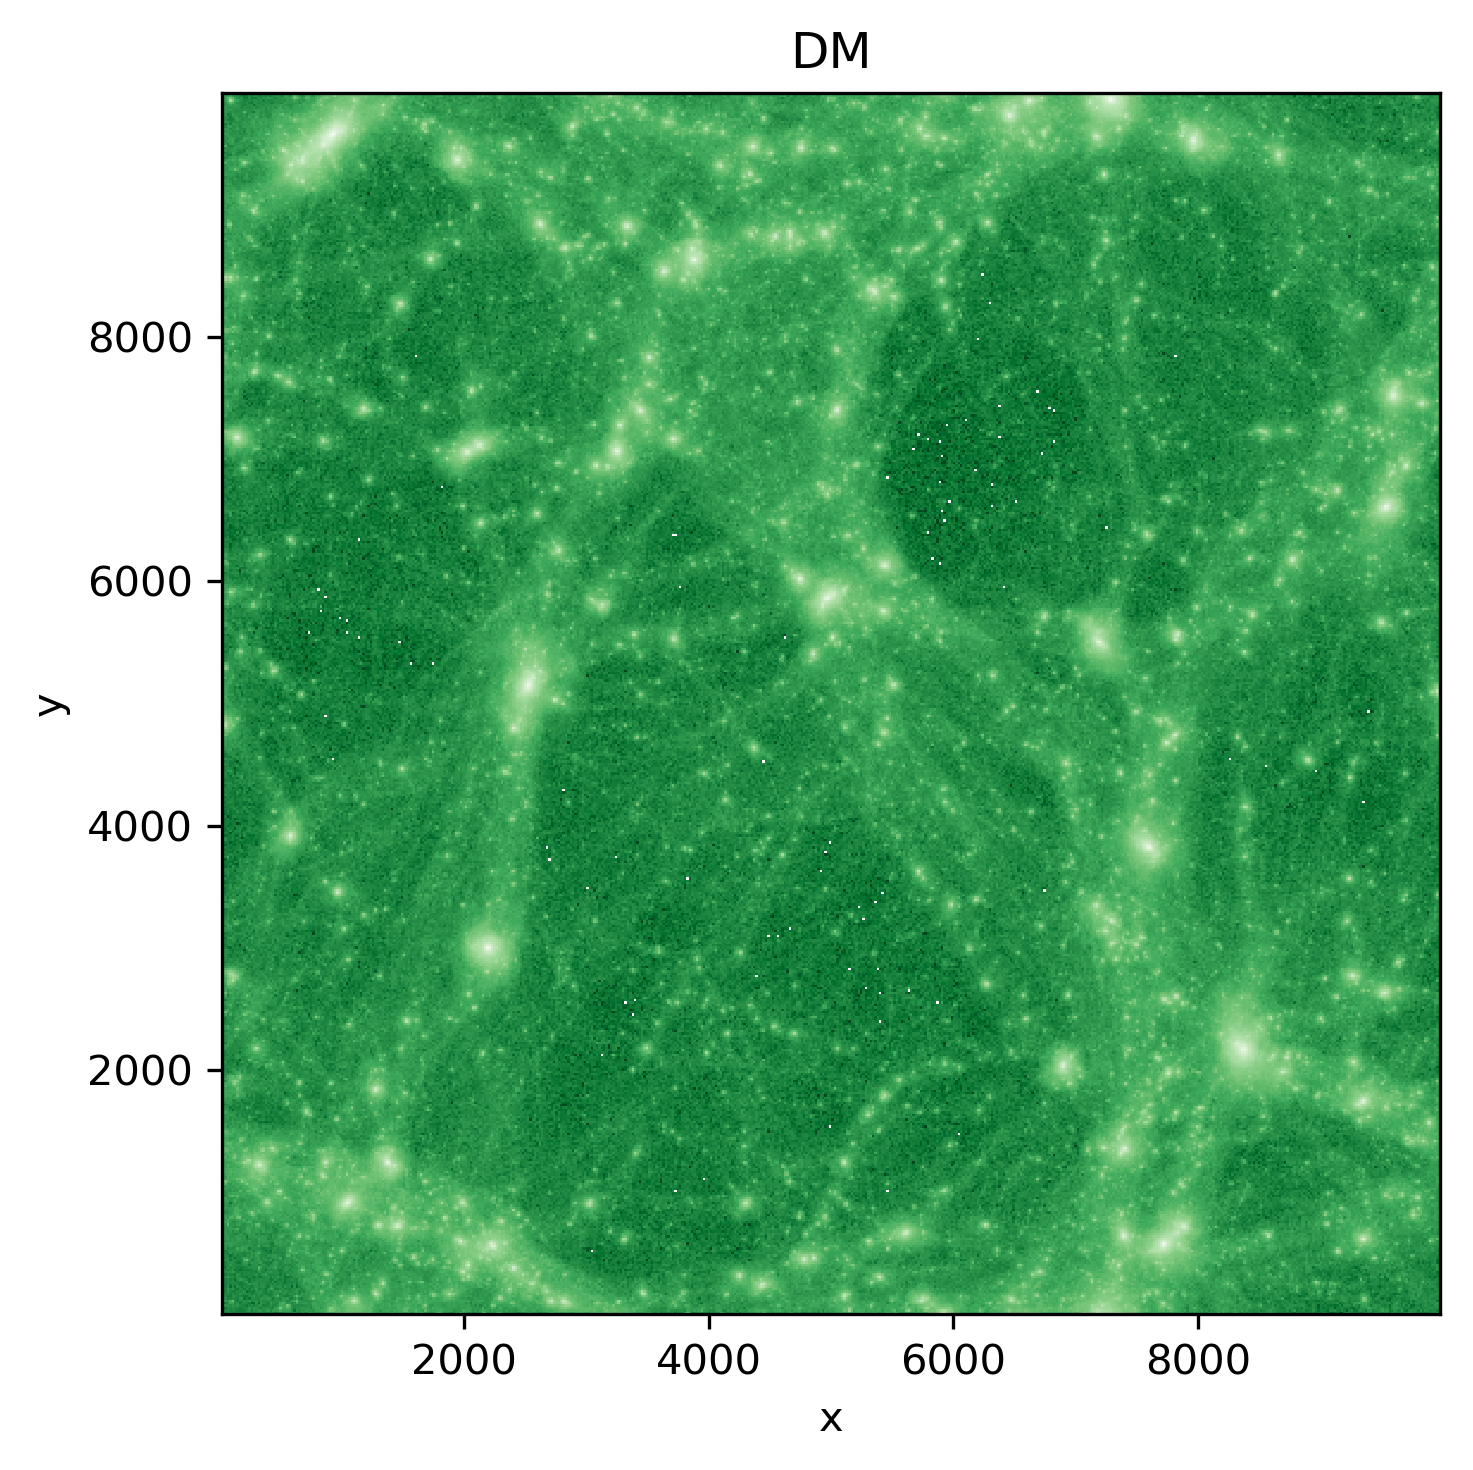

In [7]:
plt.figure(figsize=(15, 5), dpi=300)

axs = []
for i, p in enumerate([halo_pos]):
    
    if i==0:
        ax = plt.subplot2grid(shape=(1, len(plots)), loc=(0, i))
    else:
        ax = plt.subplot2grid(shape=(1, len(plots)), loc=(0, i), sharex=axs[0], sharey=axs[0])
    
    axs.append(ax)
    
    ds = vaex.from_pandas(p)
    ds.plot('x', 'y', f='log10', colormap=colors[i], colorbar=False, shape=shape)
    #ax.scatter(p.x, p.y, s=.01, alpha=.1)
    ax.set_aspect('equal')
    ax.set_title(names[i])
    
plt.tight_layout()

In [8]:
colors[i]